# Let us talk about what is the problem 
## The data is related with direct marketing campaigns of a banking institution.The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) was subscribed or not. Data set has 17 predictor varaibles (features) and around 45K rows.



# Task : The binary classification goal is to predict if the client will subscribe a bank term deposit

#### Source UCI machine learning repository

In [1]:
# import the basic libraries for data processing and visualisation

import numpy as np   # for linear algebra
import pandas as pd   # for data processing and manipulation
import matplotlib.pyplot as plt    # basic ploting 
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\DOWNLOADS\\bank\\bank-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# visualaization

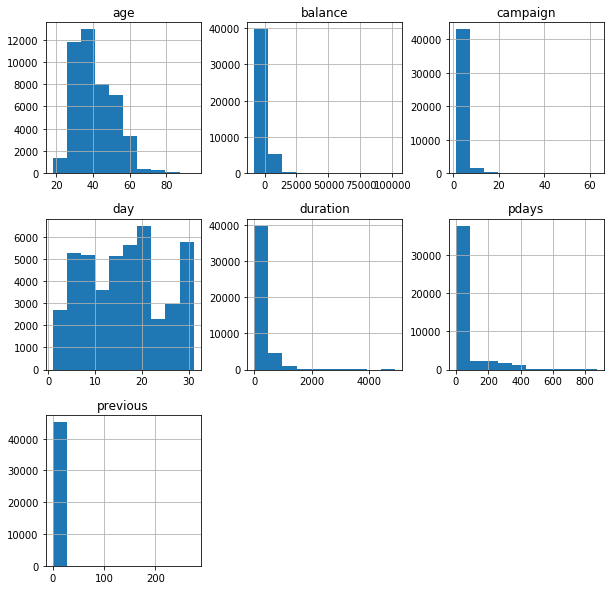

In [8]:
df.hist(figsize=(10,10))
plt.show()

In [9]:
#Selecting categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 
                       'poutcome', 'y']

#Looping through the columns and changing type to 'category'
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


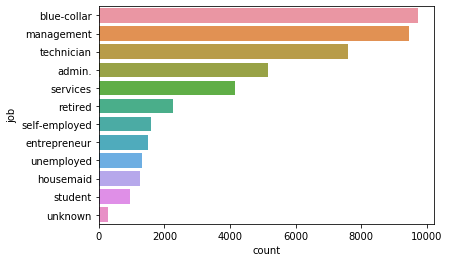

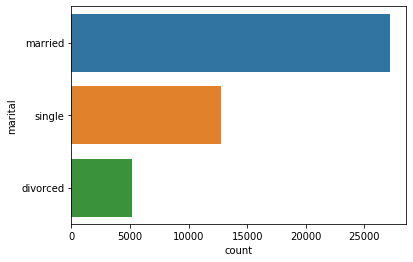

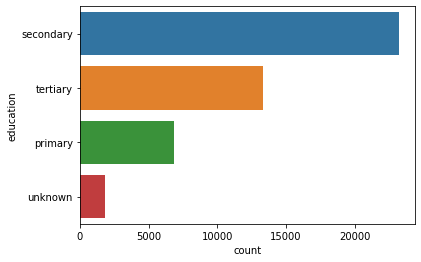

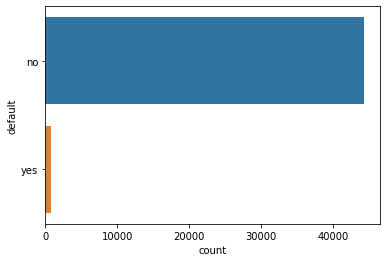

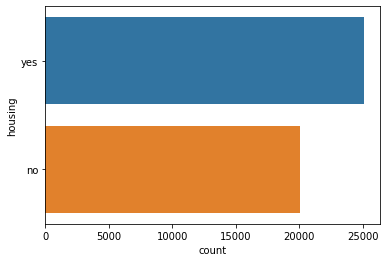

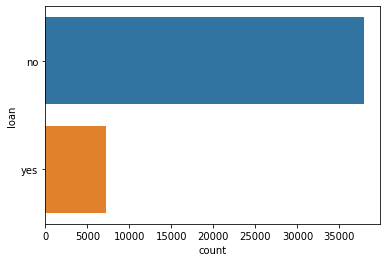

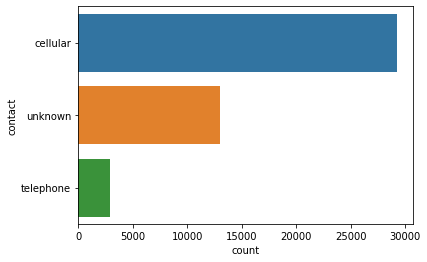

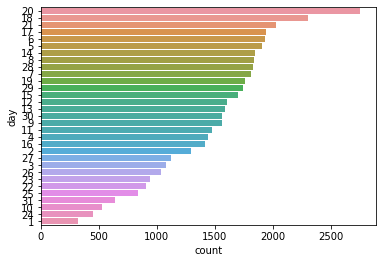

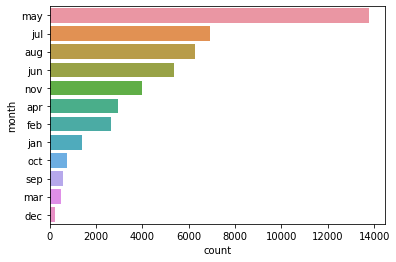

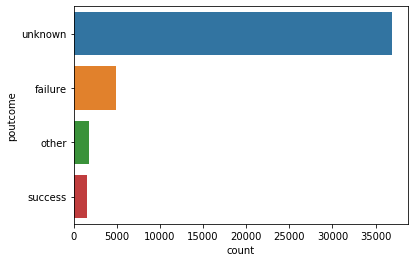

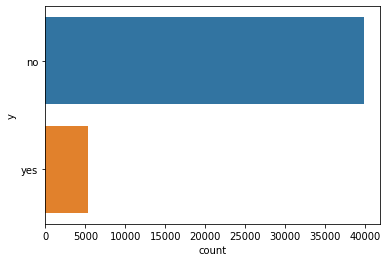

In [11]:
#Bar plots of categorical features
for feature in df.dtypes[df.dtypes == 'category'].index:
    sns.countplot(y=feature, data=df, order = df[feature].value_counts().index)
    plt.show()

In [12]:
#Type of job as proportion of the overall number of values
(df.job.value_counts()/df.job.count())*100

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

### Here is about 70% of all type of jobs belongs to just 4 categories.  In general, the limited number of the types of jobs may limit the predictive power of this variable. There is a small proportion of unknown job types, which can be dropped from the dataset.

In [13]:
#Marital status as proportion of the overall number of values
df.marital.value_counts()/df.marital.count()

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

In [14]:
# Education as proportion of the overall number of values
df.education.value_counts()/df.education.count()

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

### More then 50% of targeted individuals has secondary education . There is relatively small number of targeted individuals with an unknown education level

In [15]:
#Past defaults on a credit as proportion of the overall number of values
df.default.value_counts()/df.default.count()

no     0.981973
yes    0.018027
Name: default, dtype: float64

In [16]:
#Respondents with housing loans as proportion of the overall number of values
df.housing.value_counts()/df.housing.count()

yes    0.555838
no     0.444162
Name: housing, dtype: float64

In [17]:
#Respondents with personal loans as proportion of the overall number of values
df.loan.value_counts()/df.loan.count()

no     0.839774
yes    0.160226
Name: loan, dtype: float64

In [18]:
#Contact communication type as proportion of the overall number of values
df.contact.value_counts()/df.contact.count()

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

In [19]:
#Last contact month as proportion of the overall number of values
df.month.value_counts()/df.month.count()

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

In [20]:
#Last contact day as proportion of the overall number of values
# df.day.value_counts()/df.day.count()

In [21]:
#Outcome of the previous campaign as proportion of the overall number of values
df.poutcome.value_counts()/df.poutcome.count()

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

# Data cleaning

### To prepare the data set for using predictive modeling, we will remove the unknown values . The cleaned dataset will be saved in df_cleaned data frame  

In [22]:
# creatung a copy of the original dataset
df_cleaned = df.copy()

#Dropping the unknown job level
df_cleaned = df_cleaned[df_cleaned.job != 'unknown']
# df.job.value_counts()
# df_cleaned.job.value_counts()

#Dropping the unknown marital status
df_cleaned = df_cleaned[df_cleaned.marital != 'unknown']

#Dropping the unknown education level
df_cleaned = df_cleaned[df_cleaned.education != 'unknown']
# df_cleaned.education.value_counts()

#Deleting the 'default' column
del df_cleaned['default']

#Deleting the 'duration' column
del df_cleaned['duration']

#Dropping the unknown housing loan status
df_cleaned = df_cleaned[df_cleaned.housing != 'unknown']

#Dropping the unknown personal loan status
df_cleaned = df_cleaned[df_cleaned.loan != 'unknown']

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 15 columns):
age          43193 non-null int64
job          43193 non-null category
marital      43193 non-null category
education    43193 non-null category
balance      43193 non-null int64
housing      43193 non-null category
loan         43193 non-null category
contact      43193 non-null category
day          43193 non-null category
month        43193 non-null category
campaign     43193 non-null int64
pdays        43193 non-null int64
previous     43193 non-null int64
poutcome     43193 non-null category
y            43193 non-null category
dtypes: category(10), int64(5)
memory usage: 2.4 MB


### Now, we have to combine the sparse category like self employed and entrepreneur ,they are very similar.so we are combime these type data in our dataset which help us to improve our dataset for modeling

In [23]:
#Combining entrepreneurs and self-employed into self-employed
df_cleaned.job.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace=True)
# df_cleaned.job.value_counts()
# df.job.value_counts()

In [24]:
#Combining admin and management job into admin_management
df_cleaned.job.replace(['admin.','management'],'admin_management',inplace=True)
df_cleaned.job.value_counts()

admin_management    14216
blue-collar          9278
technician           7355
services             4004
self-employed        2951
retired              2145
unemployed           1274
housemaid            1195
student               775
Name: job, dtype: int64

In [25]:
# Combining blue-collar and technician into blue-collar
df_cleaned.job.replace(['blue-collar','technician'],'blue-collar',inplace=True)
df_cleaned.job.value_counts()

blue-collar         16633
admin_management    14216
services             4004
self-employed        2951
retired              2145
unemployed           1274
housemaid            1195
student               775
Name: job, dtype: int64

In [26]:
#Combining retired and unemployed into no_active_income
df_cleaned.job.replace(['retired', 'unemployed'], 'no_active_income', inplace=True)

In [27]:
#Combining services and housemaid into services
df_cleaned.job.replace(['services', 'housemaid'], 'services', inplace=True)

In [28]:
#Combining single and divorced into single
df_cleaned.marital.replace(['single', 'divorced'], 'single', inplace=True)

In [29]:
#Comparing number of entries for 'poutcome' and 'pdays'
a = df_cleaned.poutcome.value_counts()
b = df_cleaned.pdays.value_counts()
print(a['unknown'], b[-1])

35286 35281


In [30]:
df_cleaned.poutcome.value_counts()

unknown    35286
failure     4709
other       1774
success     1424
Name: poutcome, dtype: int64

In [31]:
df_cleaned.pdays.value_counts()

-1      35281
 182      151
 92       138
 183      120
 91       115
        ...  
 717        1
 589        1
 493        1
 45         1
 32         1
Name: pdays, Length: 557, dtype: int64

In [32]:
c = df_cleaned.previous.value_counts()
print(c[0])

35281


In [33]:
#Filtering the 'poutcome' and 'pdays' variables
not_matching = df_cleaned.loc[( (df_cleaned['pdays'] == -1) & (df['poutcome'] != 'unknown') )]

#Counting the values
not_matching.poutcome.value_counts()

unknown    0
success    0
other      0
failure    0
Name: poutcome, dtype: int64

In [34]:
#Getting the positions of the mistakenly labeled 'pdays'
ind_1 = df_cleaned.loc[(df_cleaned['pdays'] == -1) & (df['poutcome'] != 'unknown')]['pdays'].index.values
# ind_1

#Assigning NaNs instead of '-1'
df_cleaned.loc[ind_1, 'pdays'] = np.nan

In [35]:
df_cleaned.dropna()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,admin_management,married,tertiary,2143,yes,no,unknown,5,may,1,-1.0,0,unknown,no
1,44,blue-collar,single,secondary,29,yes,no,unknown,5,may,1,-1.0,0,unknown,no
2,33,self-employed,married,secondary,2,yes,yes,unknown,5,may,1,-1.0,0,unknown,no
5,35,admin_management,married,tertiary,231,yes,no,unknown,5,may,1,-1.0,0,unknown,no
6,28,admin_management,single,tertiary,447,yes,yes,unknown,5,may,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,blue-collar,married,tertiary,825,no,no,cellular,17,nov,3,-1.0,0,unknown,yes
45207,71,no_active_income,single,primary,1729,no,no,cellular,17,nov,2,-1.0,0,unknown,yes
45208,72,no_active_income,married,secondary,5715,no,no,cellular,17,nov,5,184.0,3,success,yes
45209,57,blue-collar,married,secondary,668,no,no,telephone,17,nov,4,-1.0,0,unknown,no


In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 15 columns):
age          43193 non-null int64
job          43193 non-null object
marital      43193 non-null category
education    43193 non-null category
balance      43193 non-null int64
housing      43193 non-null category
loan         43193 non-null category
contact      43193 non-null category
day          43193 non-null category
month        43193 non-null category
campaign     43193 non-null int64
pdays        43193 non-null float64
previous     43193 non-null int64
poutcome     43193 non-null category
y            43193 non-null category
dtypes: category(9), float64(1), int64(4), object(1)
memory usage: 3.9+ MB


# Statisrical Analysis

In [37]:
df_cleaned.corr()

,age,balance,campaign,pdays,previous
age,1.000000,0.097602,0.004050,-0.023248,0.001099
balance,0.097602,1.000000,-0.016251,0.003928,0.016564
campaign,0.004050,-0.016251,1.000000,-0.088920,-0.032381
pdays,-0.023248,0.003928,-0.088920,1.000000,0.452953
previous,0.001099,0.016564,-0.032381,0.452953,1.000000


In [38]:
#Substituting the string predictor variable values with numbers
df_cleaned.y.replace(['yes'], 1, inplace=True)
df_cleaned.y.replace(['no'], 0, inplace=True)

In [39]:
#Splitting the variables into predictor and target variables
X = df_cleaned.drop('y', axis=1)
y = df_cleaned.y

In [40]:
from sklearn import preprocessing
X = X.apply(preprocessing.LabelEncoder().fit_transform)
X.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,40,0,0,2,3012,1,0,2,4,8,0,0,0,3
1,26,1,1,1,928,1,0,2,4,8,0,0,0,3
2,15,3,0,1,901,1,1,2,4,8,0,0,0,3
5,17,0,0,2,1130,1,0,2,4,8,0,0,0,3
6,10,0,1,2,1346,1,1,2,4,8,0,0,0,3


In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[ 1.63974307, -0.94498148, -0.81530776, ..., -0.41526192,
        -0.30533702,  0.44600038],
       [ 0.3078659 , -0.22883822,  1.22653071, ..., -0.41526192,
        -0.30533702,  0.44600038],
       [-0.73860902,  1.20344829, -0.81530776, ..., -0.41526192,
        -0.30533702,  0.44600038],
       ...,
       [ 2.97162024,  0.48730504, -0.81530776, ...,  1.44740245,
         1.28063585, -0.56264376],
       [ 1.54460899, -0.22883822, -0.81530776, ..., -0.41526192,
        -0.30533702,  0.44600038],
       [-0.35807268,  1.20344829, -0.81530776, ...,  1.4885663 ,
         5.50989682, -1.57128789]])

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2)
ytrain

26797    0
42509    0
9374     0
9824     0
19170    0
        ..
40177    1
35007    0
25111    0
26379    0
35441    0
Name: y, Length: 34554, dtype: int64

# (1) Support vector machine(SVM)

In [43]:
from sklearn.svm import SVC
svc = SVC(C=0.5,kernel='rbf')

In [44]:
svc.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
ypred = svc.predict(xtest)

In [46]:
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
svc.score(xtrain, ytrain)

0.8937604908259535

In [48]:
from sklearn import metrics

In [49]:
svm_score = metrics.accuracy_score(ytest, ypred)
svm_score

0.8925801597407107

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(ytest,ypred)

array([[7585,   43],
       [ 885,  126]], dtype=int64)

In [51]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7628
           1       0.75      0.12      0.21      1011

    accuracy                           0.89      8639
   macro avg       0.82      0.56      0.58      8639
weighted avg       0.88      0.89      0.86      8639



# (2) Logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [53]:
log_reg.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = log_reg.predict(xtest)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
logistic_reg_score = metrics.accuracy_score(ytest,y_pred)
logistic_reg_score

0.8828568121310337

In [56]:
confusion_matrix(ytest,y_pred)

array([[7614,   14],
       [ 998,   13]], dtype=int64)

# (3) KNearestNeighbor  

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [58]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
knn_y_pred = knn.predict(xtest)

In [60]:
knn_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
knn_score = metrics.accuracy_score(ytest,knn_y_pred)
knn_score

0.8829725662692441

In [62]:
confusion_matrix(ytest,knn_y_pred)

array([[7457,  171],
       [ 840,  171]], dtype=int64)

In [63]:
print(classification_report(ytest,knn_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7628
           1       0.50      0.17      0.25      1011

    accuracy                           0.88      8639
   macro avg       0.70      0.57      0.59      8639
weighted avg       0.85      0.88      0.86      8639



# (4) Decision tree 

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [65]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
dtc_y_pred = dtc.predict(xtest)

In [67]:
dtc.score(xtrain,ytrain)

0.9049024714938936

In [68]:
decisiontree_score = metrics.accuracy_score(ytest,dtc_y_pred)
decisiontree_score

0.8892232897326079

In [69]:
confusion_matrix(ytest,dtc_y_pred)

array([[7499,  129],
       [ 828,  183]], dtype=int64)

In [70]:
print(classification_report(ytest,dtc_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7628
           1       0.59      0.18      0.28      1011

    accuracy                           0.89      8639
   macro avg       0.74      0.58      0.61      8639
weighted avg       0.86      0.89      0.86      8639



In [71]:
pd.crosstab(ytest,dtc_y_pred,rownames=[True],colnames=['predicted'],margins=True)

True,0,1,All
predicted,,,
0,7499,828,7628
1,129,183,1011
All,8327,312,8639


In [72]:
df_scores = pd.DataFrame([svm_score*100,logistic_reg_score*100,knn_score*100,decisiontree_score*100],
                        index=['SVM model','LogisticRegression model','KNN model','DecisionTree model'],
                        columns=['Accuracy_Score'])

In [73]:
df_scores

,Accuracy_Score
SVM model,89.258016
LogisticRegression model,88.285681
KNN model,88.297257
DecisionTree model,88.922329


In [74]:
# All the models are giving almost similar score.